In [117]:
import numpy as np

N = 4000
x = np.random.rand(2,1,N)
xhat = np.random.rand(2,1,N)
y = np.random.rand(1,1,N)
u = 2.*np.random.rand(1,1,N)
#W = np.random.rand(7,1,N)
W = np.zeros([7,1,N])
L = 1.*np.random.rand(2,1,N)
L[:,0,0] = [-1.57759125, -2.32097796]
#L[:,0,0] = [1.57759125, 2.32097796]

def NN(W,x,y):
    return W[0]*np.power(x[0],2)+W[1]*np.power(x[1],2)+W[2]*x[0]*y+W[3]*x[1]*y+W[4]*x[0]*x[1]+W[5]*x[0]+W[6]*x[1]

def NN_xy(W,x,y):
    return np.array([2.*W[0]*x[0]+W[2]*y+W[4]*x[1]+W[5],2.*W[1]*x[1]+W[3]*y+W[4]*x[0]+W[6],W[2]*x[0]+W[3]*x[1]],dtype=np.float64)

def Sigma_xy(x,y):
    return np.array([[2.*x[0],0.,y,0.,x[1],1.,0.],[0.,2.*x[1],0.,y,x[0],0.,1.]],dtype=np.float64)
def Sigma_y(x,y):
    return np.array([[0.,0.,2.*y,W[3]*x[0],W[4]*x[1],0.,0.,0.]],dtype=np.float64)
print(NN(W[:,0,10],x[:,0,10],y[:,0,0]))
print(NN_xy(W[:,0,10],x[:,0,10],y[:,0,0])[2:3])
print(np.shape(Sigma_xy(x[:,0,10],y[:,0,0]).T))

[0.]
[0.]
(7, 2)


C:\Users\aba212\AppData\Local\Temp\ipykernel_17264\2767160338.py:18: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return np.array([2.*W[0]*x[0]+W[2]*y+W[4]*x[1]+W[5],2.*W[1]*x[1]+W[3]*y+W[4]*x[0]+W[6],W[2]*x[0]+W[3]*x[1]],dtype=np.float64)
C:\Users\aba212\AppData\Local\Temp\ipykernel_17264\2767160338.py:21: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return np.array([[2.*x[0],0.,y,0.,x[1],1.,0.],[0.,2.*x[1],0.,y,x[0],0.,1.]],dtype=np.float64)


In [118]:
def fun(x,u):
    dx1 = -np.power(x[0],3) + x[1]+ 0.1*np.random.rand()
    dx2 = -x[0] - x[1] + u[0] + 0.1*np.random.rand()
    y = x[0] + 0.2*np.random.rand()
    return np.array([dx1,dx2],dtype=np.float64),y

def fun_hat(x,u,L,y):
    dx1 = -np.power(x[0],3) + x[1] + L[0]*(y-x[0])
    dx2 = -x[0] - x[1] + u[0] + L[1]*(y-x[0])
    F = -5.

    #=dx2 = (F**2 + F +1)*x[1]-(F*( -x[0] - x[1])-(-np.power(x[0],3) + x[1])) + u[0] +((-x[0] - x[1]-F*x[1])/(F*x[0]))*(-x[0] - x[1]+L[0]*(y[0]-x[0]))
    
    return np.array([dx1,dx2],dtype=np.float64)

def updateX(x,fx):
    dt = 0.01
    return x + dt*fx



In [129]:
def fun(x,u):
    dx1 = -np.power(x[0],3) + x[1]+ 0.02*np.random.rand()
    dx2 = -x[0] - x[1] + u[0] + 0.05*np.random.rand()
    y = x[0] + 0.02*np.random.rand()
    return np.array([dx1,dx2],dtype=np.float64),y

def updateX(x,fx):
    dt = 0.01
    return x + dt*fx

def updateW(W,fx,x,y,u,L):
    p_1 = NN_xy(W,x,y)[0:2]
    p_2 = NN_xy(W,x,y)[2:3]
    L = L.reshape(-1,1)
    dW = np.matmul(p_1.T,fx)+1.*np.matmul(L.T,L) + np.matmul(p_1.T,p_1)+ p_2[0]*fx[0]+np.matmul(p_1.T,np.matmul(L,[y-x[0]])) + 0.5*(y-x[0])**2

    return dW

def updateV(W,fx,x,y,u,L):
    p_1 = NN_xy(W,x,y)[0:2]
    L = L.reshape(-1,1)
    dV = np.matmul(p_1.T,L)[0]+1.*(y-x[0])
    return dV


for i in range(N-1):

    fx,y_new = fun(x[:,0,i],u[:,0,i])
    y[:,0,i+1] = y_new
    x[:,0,i+1] = updateX(x[:,0,i],fx)
    
    #print(updateV(W[:,0,i],fx,x[:,0,i],y[:,0,i],u[:,0,i],L[:,0,i]))
    fx_hat = fun_hat(xhat[:,0,i],u[:,0,i],L[:,0,i],y[:,0,i])
    VV = NN_xy(W[:,0,i],xhat[:,0,i],y_new)[0:2]
    #VV = L[:,0,i]#*(np.matmul(NN_xy(W[:,0,i],x[:,0,i],y[:,0,i])[0:2].T,fx_hat))
    #VV = (np.matmul(Sigma_xy(xhat[:,0,i],y[:,0,i]).T,L[:,0,i].T))
    
    #print(fx)
    #print(fx_hat)
    SS = (np.matmul(Sigma_xy(xhat[:,0,i],y[:,0,i]).T,fx_hat.T[0]))
    #SS = (np.matmul(Sigma_xy(x[:,0,i],y[:,0,i]).T,fx))
    W[:,0,i+1] = W[:,0,i]-0.04*(SS/(SS.T@SS+1))*updateW(W[:,0,i],fx_hat,xhat[:,0,i],y[:,0,i],u[:,0,i],L[:,0,i])[0]
    L[:,0,i+1] = L[:,0,i]-0.2255*(VV/(VV.T@VV+1))*updateV(W[:,0,i],fx_hat,xhat[:,0,i],y[:,0,i],u[:,0,i],L[:,0,i])[0]
    #L[0,0,i+1] = (2.*W[0,0,i+1])
    #L[1,0,i+1] = 2.*W[1,0,i+1]
    #L[:,0,i+1] = [-1.57759125, -2.32097796]
    #print(SS)
    print(updateW(W[:,0,i],fx,x[:,0,i],y[:,0,i],u[:,0,i],L[:,0,i])[0])
    
    #L[:,0,i+1] = L[:,0,i]-0.0000512452255*updateV(W[:,0,i],fx_hat,xhat[:,0,i],y[:,0,i],u[:,0,i],L[:,0,i])[0]#*L[:,0,i]#np.random.rand(1,2)
    
    xhat[:,0,i+1] = updateX(xhat[:,0,i],fx_hat.T[0])



C:\Users\aba212\AppData\Local\Temp\ipykernel_17264\2767160338.py:21: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return np.array([[2.*x[0],0.,y,0.,x[1],1.,0.],[0.,2.*x[1],0.,y,x[0],0.,1.]],dtype=np.float64)
C:\Users\aba212\AppData\Local\Temp\ipykernel_17264\2767160338.py:18: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return np.array([2.*W[0]*x[0]+W[2]*y+W[4]*x[1]+W[5],2.*W[1]*x[1]+W[3]*y+W[4]*x[0]+W[6],W[2]*x[0]+W[3]*x[1]],dtype=np.float64)


[7.87586732]
[7.5769579]
[7.82528305]
[8.37561165]
[6.90021591]
[6.38014242]
[6.35219928]
[5.92861316]
[6.32116812]
[4.84788095]
[6.80480138]
[5.55257686]
[2.55644375]
[2.24301051]
[1.99737833]
[3.35068467]
[3.19037749]
[5.42892085]
[2.9735476]
[2.49963048]
[2.52103241]
[5.58181872]
[2.53592922]
[4.10872655]
[3.37204591]
[4.88314057]
[7.33702923]
[4.43883708]
[2.19537557]
[2.84206116]
[3.73314355]
[4.35651339]
[4.82811871]
[8.34522419]
[5.55478404]
[5.12493149]
[4.57170546]
[8.61480151]
[6.4749869]
[3.52371436]
[4.2272259]
[7.2099205]
[3.17987007]
[3.51873747]
[5.28035694]
[5.16804756]
[7.75882291]
[4.57524224]
[8.09007013]
[5.92318942]
[4.41847143]
[2.64765549]
[5.5891728]
[4.81539933]
[1.57724344]
[3.12228917]
[2.64503758]
[2.34931707]
[4.35472759]
[3.00887214]
[3.20094084]
[4.48831569]
[3.97047433]
[3.28514348]
[1.4110911]
[2.87139382]
[2.61131301]
[1.73928467]
[1.16762438]
[2.86671322]
[2.4101563]
[0.84203087]
[1.92059471]
[0.99047452]
[1.750344]
[0.85960444]
[2.21053034]
[0.711872

[0.08782743]
[0.08752016]
[0.08384985]
[0.08353379]
[0.09569667]
[0.08390288]
[0.085774]
[0.0930654]
[0.09083409]
[0.09312272]
[0.09171398]
[0.08679803]
[0.09167302]
[0.08560206]
[0.08849973]
[0.0910612]
[0.09139779]
[0.09894413]
[0.0864548]
[0.08818774]
[0.09989366]
[0.08847232]
[0.09730441]
[0.09464212]
[0.08780429]
[0.08591073]
[0.09773787]
[0.09315993]
[0.08181848]
[0.08212072]
[0.08320473]
[0.08105897]
[0.09365753]
[0.08361272]
[0.0874203]
[0.10207407]
[0.08758364]
[0.09256296]
[0.08421442]
[0.0877945]
[0.08945523]
[0.07793032]
[0.08057635]
[0.09160454]
[0.08145505]
[0.08561733]
[0.09287323]
[0.08542846]
[0.07941686]
[0.08644935]
[0.07867173]
[0.10032496]
[0.07480271]
[0.07383301]
[0.079899]
[0.08087402]
[0.07454514]
[0.07983744]
[0.07576706]
[0.08528805]
[0.10495751]
[0.07943104]
[0.0628929]
[0.10338235]
[0.08631583]
[0.09020243]
[0.07220069]
[0.06452513]
[0.06629886]
[0.08303946]
[0.07304599]
[0.07836806]
[0.07915122]
[0.07856702]
[0.07601101]
[0.05845575]
[0.08226381]
[0.061770

[0.06082538]
[0.06325749]
[0.06265987]
[0.0676904]
[0.06977923]
[0.06768222]
[0.06670282]
[0.06444611]
[0.06651288]
[0.06337936]
[0.07407124]
[0.06708014]
[0.06750905]
[0.0716645]
[0.07415999]
[0.06703317]
[0.06499988]
[0.06403783]
[0.06753335]
[0.06700993]
[0.06338158]
[0.06382312]
[0.0668003]
[0.06140878]
[0.06745194]
[0.06259217]
[0.05958525]
[0.05837312]
[0.06269199]
[0.06011398]
[0.05644557]
[0.05980953]
[0.05889157]
[0.06172759]
[0.06026386]
[0.0604491]
[0.06387314]
[0.05985687]
[0.06055361]
[0.06505672]
[0.06590648]
[0.06570339]
[0.0636421]
[0.05808601]
[0.06758412]
[0.06611417]
[0.06713962]
[0.06548829]
[0.06620949]
[0.07010078]
[0.07223724]
[0.07078845]
[0.07476028]
[0.07336835]
[0.07329701]
[0.0694258]
[0.0700414]
[0.07301828]
[0.07321845]
[0.0742237]
[0.07386553]
[0.07069198]
[0.074349]
[0.07691272]
[0.07570095]
[0.07505691]
[0.07445848]
[0.08013303]
[0.08181164]
[0.07529743]
[0.07331694]
[0.07631527]
[0.0731138]
[0.07354383]
[0.06977588]
[0.06917875]
[0.07341674]
[0.0743681

[0.05499482]
[0.0535699]
[0.05576959]
[0.06006042]
[0.06224403]
[0.06611836]
[0.06643143]
[0.06842533]
[0.06918217]
[0.06720634]
[0.06222855]
[0.06169723]
[0.06743089]
[0.06606511]
[0.05973441]
[0.06590802]
[0.06967766]
[0.06187657]
[0.06114911]
[0.07124162]
[0.0682146]
[0.0644871]
[0.06500682]
[0.06051747]
[0.05910235]
[0.06298786]
[0.06466978]
[0.0618759]
[0.05326157]
[0.0666769]
[0.05739893]
[0.05978591]
[0.06872406]
[0.06523347]
[0.06168328]
[0.05868435]
[0.06406414]
[0.06203824]
[0.06040381]
[0.06039097]
[0.05667563]
[0.05689888]
[0.05581111]
[0.05087333]
[0.05278673]
[0.05637768]
[0.06026977]
[0.05740755]
[0.0577833]
[0.06320068]
[0.06019262]
[0.06149737]
[0.05875858]
[0.05964866]
[0.05589316]
[0.05434868]
[0.06119955]
[0.05916291]
[0.0655902]
[0.05925957]
[0.05921774]
[0.06509741]
[0.0610325]
[0.06227218]
[0.06279448]
[0.05846428]
[0.05892433]
[0.06157638]
[0.0586073]
[0.05856693]
[0.05685397]
[0.05663268]
[0.05859687]
[0.05966135]
[0.06218614]
[0.05969399]
[0.06065808]
[0.05659

[0.06359007]
[0.06076228]
[0.06035635]
[0.06840746]
[0.0664205]
[0.06314997]
[0.06388496]
[0.05446087]
[0.0621331]
[0.06085467]
[0.06420746]
[0.05483819]
[0.06249043]
[0.05813442]
[0.05995659]
[0.0566345]
[0.0612032]
[0.06336006]
[0.06111448]
[0.06526181]
[0.06371955]
[0.06527469]
[0.06424089]
[0.06953565]
[0.06540711]
[0.06056699]
[0.0646582]
[0.06651667]
[0.06448593]
[0.06318968]
[0.07065851]
[0.06418879]
[0.07100033]
[0.06530272]
[0.06742016]
[0.06854713]
[0.0669756]
[0.06377766]
[0.0640386]
[0.06509184]
[0.06454564]
[0.06742624]
[0.06941929]
[0.0673052]
[0.06811513]
[0.06643931]
[0.06354536]
[0.05912526]
[0.06530604]
[0.0624645]
[0.05951272]
[0.05926747]
[0.06173547]
[0.06160552]
[0.0599448]
[0.06293097]
[0.05950535]
[0.06411938]
[0.06247857]
[0.0598128]
[0.06631575]
[0.06476311]
[0.06582908]
[0.06236515]
[0.06732941]
[0.06597043]
[0.06964055]
[0.06301694]
[0.07070259]
[0.06426901]
[0.06567467]
[0.06491717]
[0.06095848]
[0.06339022]
[0.0642139]
[0.06281586]
[0.05850563]
[0.05757818

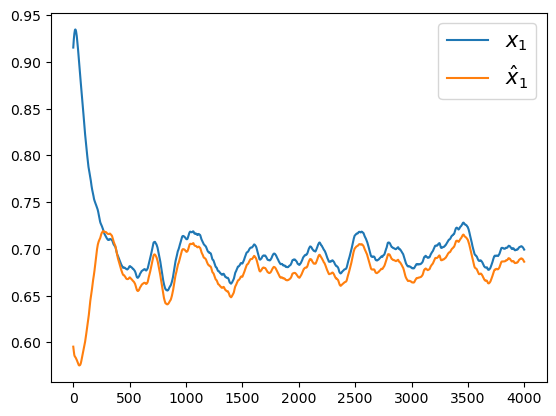

In [130]:
import matplotlib.pyplot as plt
plt.plot(x[0,0,:])
plt.plot(xhat[0,0,:])

plt.legend(['${x}_1$','$\hat{x}_1$'],loc='upper right', fontsize=15);

plt.show()

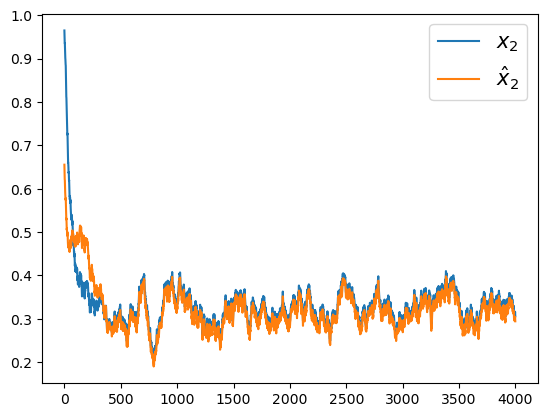

In [131]:
plt.plot(x[1,0,:])
plt.plot(xhat[1,0,:])

plt.legend(['${x}_2$','$\hat{x}_2$'],loc='upper right', fontsize=15);
plt.show()

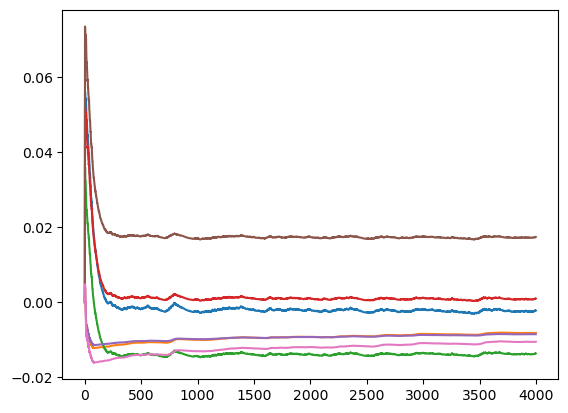

In [122]:

plt.plot(W[6,0,:])
plt.plot(W[5,0,:])
plt.plot(W[4,0,:])
plt.plot(W[3,0,:])
plt.plot(W[2,0,:])
plt.plot(W[1,0,:])
plt.plot(W[0,0,:])
plt.show()

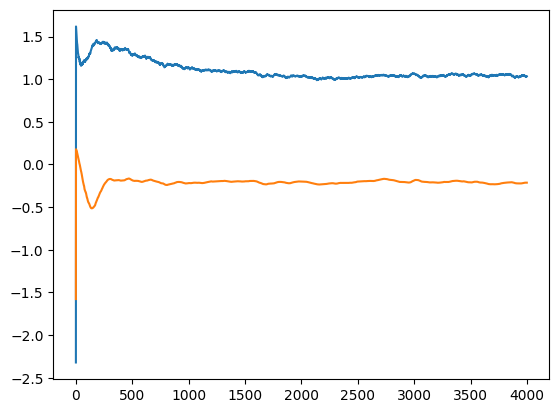

In [914]:
plt.plot(L[1,0,:])
plt.plot(L[0,0,:])
plt.show()